# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [164]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [165]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [166]:
# Set the API base URL
url = (f'https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}')

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (f'{url}&q={city}')
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

#     # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | weno
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | fort st. john
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | dakhla
Processing Record 8 of Set 1 | remire-montjoly
Processing Record 9 of Set 1 | boguchany
Processing Record 10 of Set 1 | mount gambier
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | malango
Processing Record 13 of Set 1 | lata
Processing Record 14 of Set 1 | tura
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | chibougamau
Processing Record 18 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 19 of Set 1 | saint-francois
Processing Record 20 of Set 1 | nar'yan-mar
Processing Record 21 of Set 1 | ahau
Cit

Processing Record 38 of Set 4 | penal
Processing Record 39 of Set 4 | north ridgeville
Processing Record 40 of Set 4 | jabor
Processing Record 41 of Set 4 | tacarigua
Processing Record 42 of Set 4 | les cayes
Processing Record 43 of Set 4 | kittila
Processing Record 44 of Set 4 | khanbari
Processing Record 45 of Set 4 | shunyi
Processing Record 46 of Set 4 | hithadhoo
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | kiunga
Processing Record 49 of Set 4 | west island
Processing Record 0 of Set 5 | tsiombe
Processing Record 1 of Set 5 | el rosario
Processing Record 2 of Set 5 | port saint john's
Processing Record 3 of Set 5 | bellbrook
Processing Record 4 of Set 5 | nampula
Processing Record 5 of Set 5 | fada
Processing Record 6 of Set 5 | devinuwara
City not found. Skipping...
Processing Record 7 of Set 5 | garango
Processing Record 8 of Set 5 | fale old settlement
Processing Record 9 of Set 5 | phan thiet
Processing Record 10 of Set 5 | conception bay sou

Processing Record 30 of Set 8 | margate
Processing Record 31 of Set 8 | garoua boulai
Processing Record 32 of Set 8 | vernon
Processing Record 33 of Set 8 | jarny
Processing Record 34 of Set 8 | kish
Processing Record 35 of Set 8 | la junta
Processing Record 36 of Set 8 | yarmouth
Processing Record 37 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 38 of Set 8 | ponta delgada
Processing Record 39 of Set 8 | minas de marcona
Processing Record 40 of Set 8 | howard springs
Processing Record 41 of Set 8 | prince rupert
Processing Record 42 of Set 8 | arkhangel'sk
Processing Record 43 of Set 8 | arno
Processing Record 44 of Set 8 | alibag
Processing Record 45 of Set 8 | elazig
Processing Record 46 of Set 8 | tokar
Processing Record 47 of Set 8 | dunedin
Processing Record 48 of Set 8 | mahdia
Processing Record 49 of Set 8 | brookings
Processing Record 0 of Set 9 | bredy
Processing Record 1 of Set 9 | zadonsk
Processing Record 2 of Set 9 | duncan town
City not found. Skipp

Processing Record 17 of Set 12 | saint-pierre-d'oleron
City not found. Skipping...
Processing Record 18 of Set 12 | honggang
Processing Record 19 of Set 12 | souillac
Processing Record 20 of Set 12 | chhapar
Processing Record 21 of Set 12 | zhanaozen
Processing Record 22 of Set 12 | harnosand
Processing Record 23 of Set 12 | kargasok
Processing Record 24 of Set 12 | bamboo flat
Processing Record 25 of Set 12 | vingt cinq
City not found. Skipping...
Processing Record 26 of Set 12 | iowa falls
Processing Record 27 of Set 12 | sassandra
Processing Record 28 of Set 12 | paveh
Processing Record 29 of Set 12 | hajnowka
Processing Record 30 of Set 12 | ubinskoye
Processing Record 31 of Set 12 | kibakwe
Processing Record 32 of Set 12 | mankono
Processing Record 33 of Set 12 | newman
Processing Record 34 of Set 12 | igarka
Processing Record 35 of Set 12 | mukah
City not found. Skipping...
Processing Record 36 of Set 12 | launceston
-----------------------------
Data Retrieval Complete      
---

In [167]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [168]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san patricio,28.0170,-97.5169,84.18,83,8,16.28,US,1686708685
1,weno,7.4515,151.8468,89.55,66,40,11.50,FM,1686708685
2,waitangi,-43.9535,-176.5597,50.83,94,100,8.99,NZ,1686708685
3,lebu,-37.6167,-73.6500,48.81,77,97,12.17,CL,1686708685
4,fort st. john,56.2499,-120.8529,51.69,100,100,10.36,CA,1686708686


In [169]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [170]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,84.18,83,8,16.28,US,1686708685
1,weno,7.4515,151.8468,89.55,66,40,11.50,FM,1686708685
2,waitangi,-43.9535,-176.5597,50.83,94,100,8.99,NZ,1686708685
3,lebu,-37.6167,-73.6500,48.81,77,97,12.17,CL,1686708685
4,fort st. john,56.2499,-120.8529,51.69,100,100,10.36,CA,1686708686


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

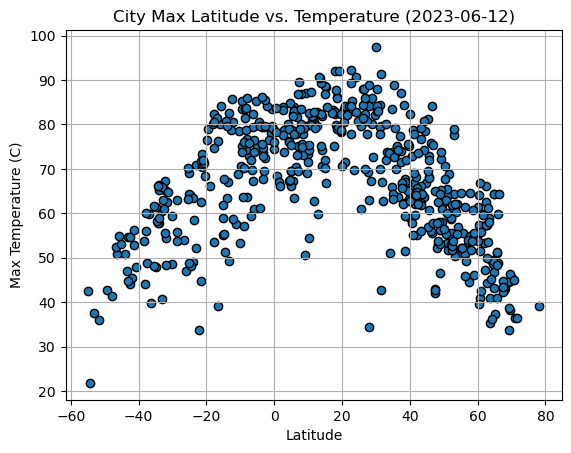

In [171]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-06-12)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

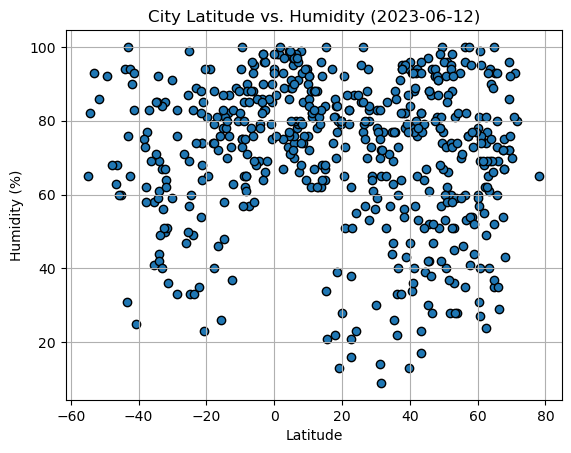

In [172]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-06-12)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

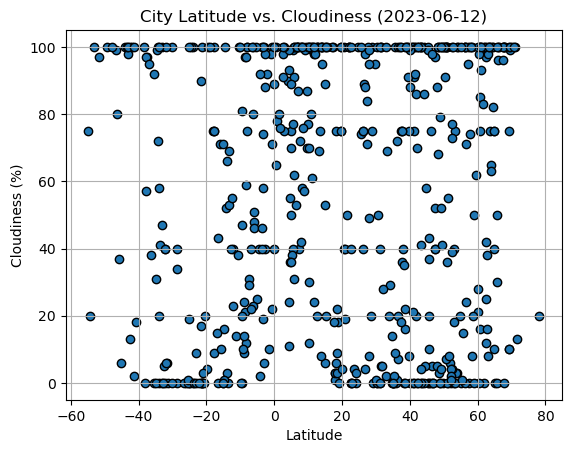

In [173]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-06-12)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

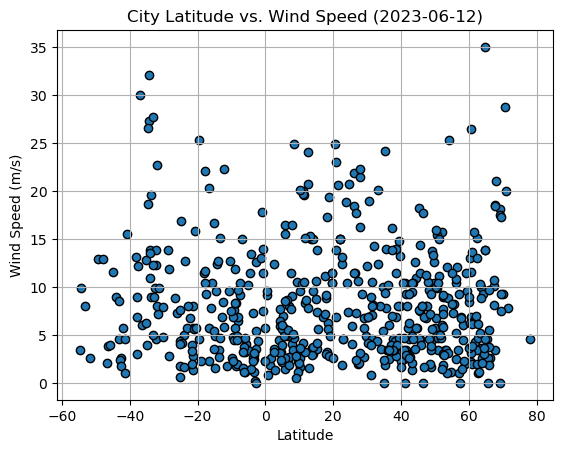

In [174]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-06-12)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [175]:
# Define a function to create Linear Regression plots
def linear_regression_function(x_values, y_values, ylabel, line_eq_coordinates):

#   Perform linear regression on x and y values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
#   Obtain regression values
    regress_values = x_values * slope + intercept
    
#   Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
#   Create plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
#   Label plot and annotate line equation on plot
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.annotate(line_eq, line_eq_coordinates, fontsize=15, color="red")
    
#   Print r-value and show plot
    print(f"The r-value is: {rvalue}")
    plt.show()

In [176]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san patricio,28.0170,-97.5169,84.18,83,8,16.28,US,1686708685
1,weno,7.4515,151.8468,89.55,66,40,11.50,FM,1686708685
4,fort st. john,56.2499,-120.8529,51.69,100,100,10.36,CA,1686708686
5,dakhla,23.6848,-15.9580,69.82,87,4,18.88,EH,1686708686
6,remire-montjoly,4.9167,-52.2667,78.84,89,75,2.30,GF,1686708686


In [177]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,50.83,94,100,8.99,NZ,1686708685
3,lebu,-37.6167,-73.6500,48.81,77,97,12.17,CL,1686708685
8,mount gambier,-37.8333,140.7667,56.01,62,97,8.93,AU,1686708687
10,malango,-2.9627,119.9001,69.62,96,100,0.18,ID,1686708687
13,puerto natales,-51.7236,-72.4875,35.98,86,97,2.55,CL,1686708688


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7422796257846908


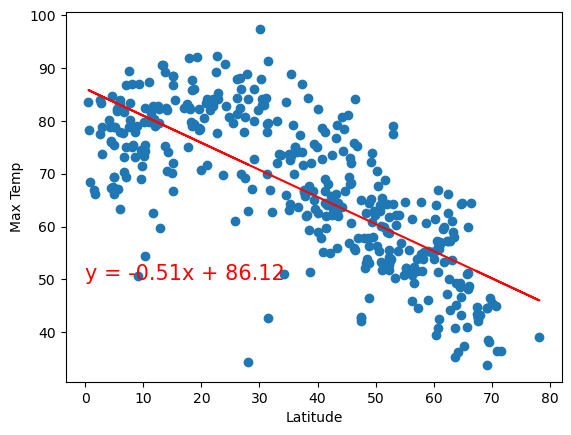

In [178]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
ylabel = "Max Temp"
line_eq_coordinates = (0,50)

linear_regression_function(x_values, y_values, ylabel, line_eq_coordinates)

The r-value is: 0.7370975768124799


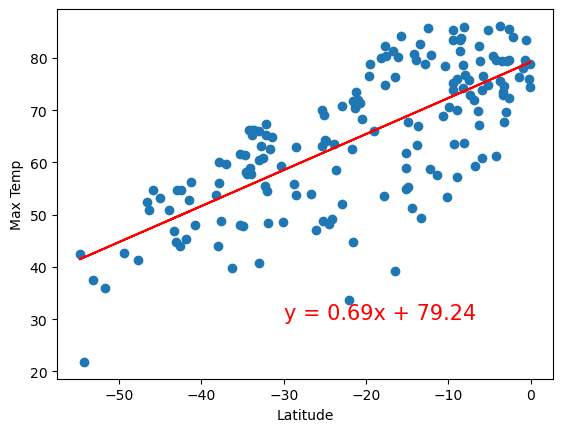

In [179]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
ylabel = "Max Temp"
line_eq_coordinates = (-30,30)

linear_regression_function(x_values, y_values, ylabel, line_eq_coordinates)

**Discussion about the linear relationship:** There is a negative relationship between the latitude of a city and its temperature in the Northern Hemisphere; as the latitude increases and the Northern Hemisphere cities in our data get further away from the equator, their temperatures decrease. The inverse relationship holds true for the Southern Hemisphere, where a positive relationship between latitude and temperature is observed. As the latitude increases and the Southern Hemisphere cities in our data get closer to the equator, the temperatures increase. Both relationships support the idea that the weather becomes warmer as we approach the equator and colder as we move farther away from it.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.20485044624269555


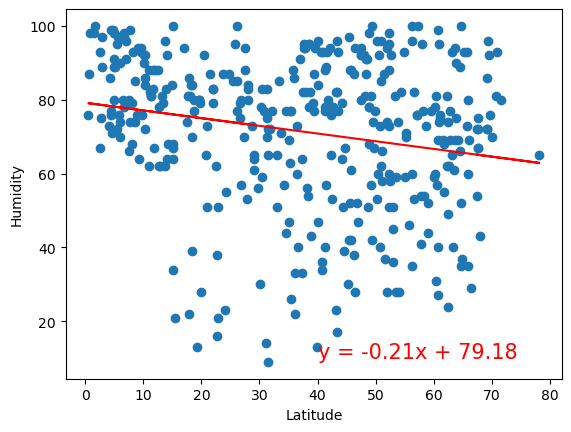

In [180]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
ylabel = "Humidity"
line_eq_coordinates = (40,10)

linear_regression_function(x_values, y_values, ylabel, line_eq_coordinates)

The r-value is: 0.24645471516573828


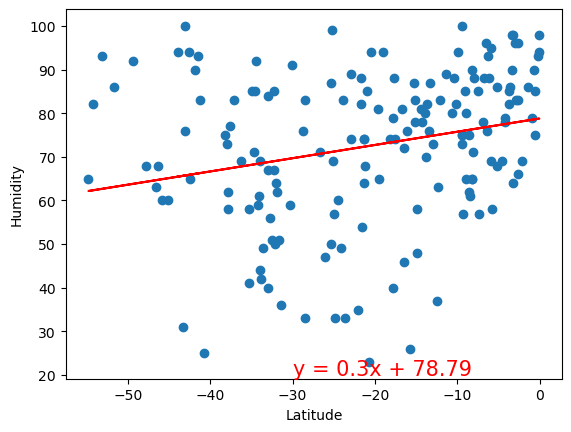

In [181]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
ylabel = "Humidity"
line_eq_coordinates = (-30,20)

linear_regression_function(x_values, y_values, ylabel, line_eq_coordinates)

**Discussion about the linear relationship:** There is a slightly negative relationship between latitude and the humidity levels of a city in the Northern Hemisphere; as the latitude increases and the Northern Hemisphere cities in our data get further away from the equator, their humidity levels decrease. The inverse relationship holds true for the Southern Hemisphere, where a slightly positive relationship between latitude and humidity is observed. As the latitude increases and the Southern Hemisphere cities in our data get closer to the equator, their humidity levels increase. It should also be noted that the relationship between latitude and humidity is much weaker than that of latitude and temperature for both the Northern and Southern Hemispheres. The data points in our scatter plots for the relationship between latitude and temperature are much more concentrated towards their regression lines, whereas the data points in our scatter plots for the relationship between latitude and humidity are more dispersed/scattered, indicating a weaker correlation. In other words, it appears on our scatter plots as though there are some cities which share a similar latitude but vary drastically in how humid they are, indicating that there are potentially some other factors which impact the humidity levels of a city as well. Nevertheless, this relationship weakly supports the idea that countries/cities closer to the equator are generally more humid, and that countries/cities farther from the equator are generally less humid.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.09472256268570549


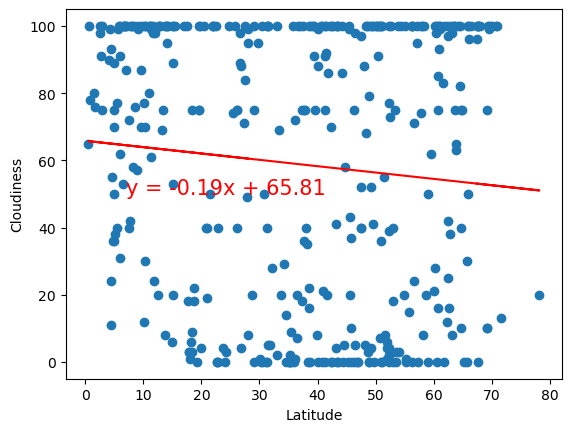

In [182]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
ylabel = "Cloudiness"
line_eq_coordinates = (7,50)

linear_regression_function(x_values, y_values, ylabel, line_eq_coordinates)

The r-value is: -0.038292958716932814


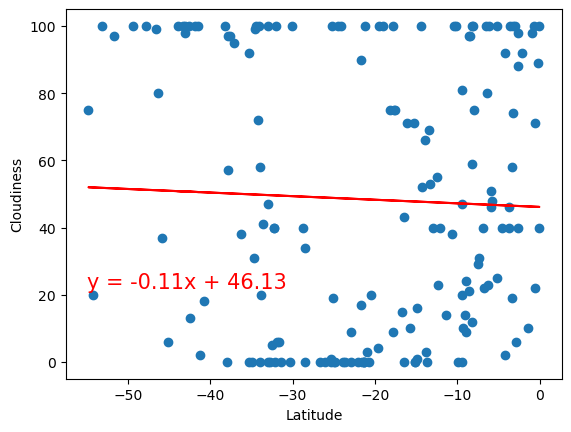

In [183]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
ylabel = "Cloudiness"
line_eq_coordinates = (-55,22)

linear_regression_function(x_values, y_values, ylabel, line_eq_coordinates)

**Discussion about the linear relationship:** There is a slightly negative relationship between the latitude and cloudiness of a city in both the Northern and Southern Hemispheres. As the latitude increases and the Northern Hemisphere cities in our data get further away from the equator, their cloudiness decreases. Likewise, as the latitude increases and the Southern Hemisphere cities in our data get closer to the equator, their cloudiness decreases as well. It should also be noted that the relationship between latitude and cloudiness is much weaker than that of latitude and temperature for both the Northern and Southern Hemispheres. The data points in our scatter plots for the relationship between latitude and temperature are much more concentrated towards their regression lines, whereas the data points in our scatter plots for the relationship between latitude and cloudiness are more dispersed/scattered, indicating a weaker correlation. In other words, it appears on our scatter plots as though there are many cities which share a similar latitude but vary drastically in how cloudy they are, indicating that there are potentially other factors which impact the cloudiness of a city as well. As such, the relationship between latitude and cloudiness is not as straightforward, and there is no immediate conclusion that can be drawn as to whether a city is more or less cloudy if it's closer to or farther away from the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.014968626675333862


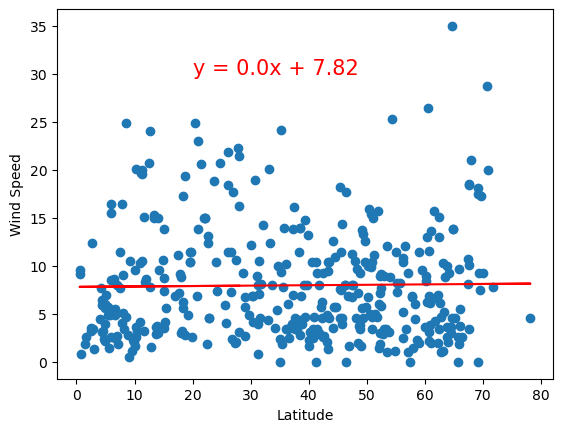

In [184]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
ylabel = "Wind Speed"
line_eq_coordinates = (20,30)

linear_regression_function(x_values, y_values, ylabel, line_eq_coordinates)

The r-value is: -0.19336114489665243


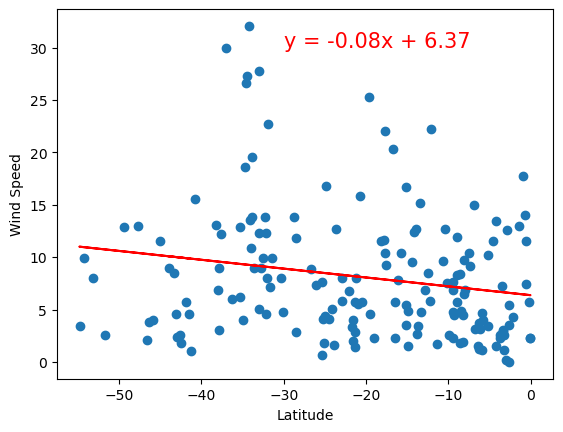

In [185]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
ylabel = "Wind Speed"
line_eq_coordinates = (-30,30)

linear_regression_function(x_values, y_values, ylabel, line_eq_coordinates)

**Discussion about the linear relationship:** There is no relationship between the latitude and wind speed of a city in the Northern Hemisphere; as the latitude increases and the Northern Hemisphere cities in our data get further away from the equator, their wind speeds do not change accordingly. This is demonstrated by the horizontal line of regression in our scatter plot for the Northern Hemisphere, which indicates a slope of 0. In the the Southern Hemisphere, a slightly negative relationship between latitude and wind speed is observed. As the latitude increases and the Southern Hemisphere cities in our data get closer to the equator, their wind speeds slightly decrease. As such, the relationship between latitude and windspeed is not straightforward, and there is no immediate conclusion that can be drawn as to whether a city's wind speed is higher or lower if it's closer to or farther away from the equator.